In [8]:
from models import *
from distance import *
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
import random

# Example 1 Section 4

Agents discussing about a proposition _p_.

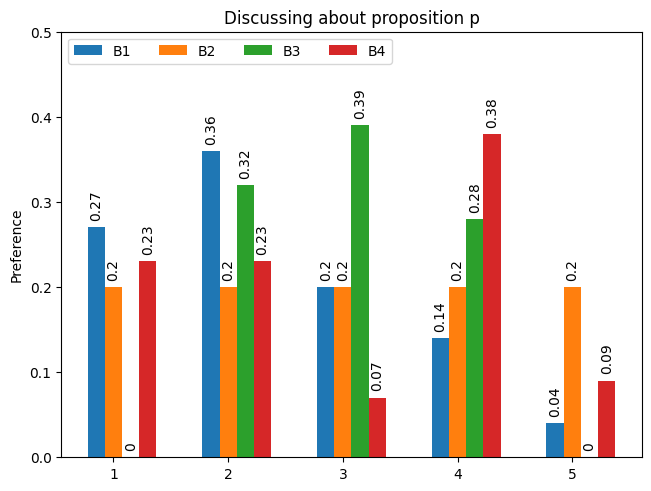

In [9]:
# A variables taking values in [1..5]
p  = Symbol('p')

# interval(2,4) means that "I'm OK with the options 2,3,4 (with equal preference between them)
def interval(l,u):
    return Lambda((p,), Piecewise((1.0/(1+u-l), Ge(p, l) & Le(p ,u)), (0.0, True)))

#Equal preference for all the 5 values
def cte(n):
    return Lambda((p,), n)

def opextreme(v1,v2):
    '''Assigning v1 in the extremes and v2 otherwise'''
    return Lambda((p,), Piecewise( (v1, Or(Eq(p,1), Eq(p,5))), (v2, True)))

ext = opextreme(1.0, 0.0)
notext = opextreme(0.0, 1.0)
dontknow = interval(1,5)

CRing = CSemiring(R, (p,))


def compare(new, old):
    EPSILON = 0.0001
    '''Two opinions are the same if they coincide for all the values in the domain'''
    for i, x in enumerate(new):
        for j in range(5):
            if abs(x(j+1) - old[i](j+1)) > EPSILON: return False

    return True

m = [ 
     [cte(0.2), cte(0.3), cte(0.4), cte(0.1)],
     [cte(0.3), cte(0.1), cte(0.2), cte(0.4)],
     [cte(0.5), cte(0.1), cte(0.2), cte(0.2)],
     [cte(0.3), cte(0.3), cte(0.3), cte(0.1)]
    ]

matrixM = matrixMultiplication(CRing, m)

B1 = [interval(1,2), interval(1,5), interval(2,4), interval(1,3)]
B2 = [interval(1,5), interval(1,5), interval(1,5), interval(1,5)]
B3 = [interval(2,2), interval(3,3), interval(4,4), interval(3,3)]
B4 = [interval(1,2), interval(1,3), interval(4,4), interval(4,5)]

models = [
        Model(R, B1,  m, matrixM, False, compare),
        Model(R, B2,  m, matrixM, False, compare),
        Model(R, B3,  m, matrixM, False, compare),
        Model(R, B4,  m, matrixM, False, compare)]

#Model(R, [ext, ext, ext, ext, ext],  m, matrixM, False, compare)]

data = [None for _ in range(len(models))]
for i,M in  enumerate(models):
    for _,b in enumerate(M):  
        data[i] = b
 
x_label = [i+1 for i in range (5)]
data = { f'B{i+1}': [ round(float(data[i][0](j+1)),2) for j in range(5) ] for i in range(len(models)) }


x = np.arange(len(x_label))  # the label locations
width = 0.15  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in data.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=5, rotation=90)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Preference')
ax.set_title('Discussing about proposition p')
ax.set_xticks(x + width, x_label)
ax.legend(loc='upper left', ncols=8)
ax.set_ylim(0, 0.5)

plt.savefig('ex1.png', format='png', dpi=300, bbox_inches='tight')
plt.show()

plt.close()

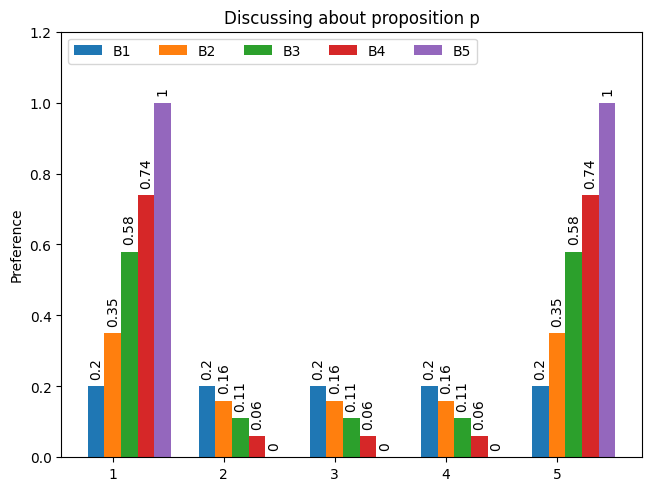

In [3]:
# Analyzing the case of extreme opinions 
m = [ 
     [cte(0.2), cte(0.3), cte(0.4), cte(0.1)],
     [cte(0.3), cte(0.1), cte(0.2), cte(0.4)],
     [cte(0.5), cte(0.1), cte(0.2), cte(0.2)],
     [cte(0.3), cte(0.3), cte(0.3), cte(0.1)]
    ]

'''m = [ 
     [cte(0.25), cte(0.25), cte(0.25), cte(0.25)],
     [cte(0.25), cte(0.25), cte(0.25), cte(0.25)],
     [cte(0.25), cte(0.25), cte(0.25), cte(0.25)],
     [cte(0.25), cte(0.25), cte(0.25), cte(0.25)]]
'''
matrixM = matrixMultiplication(CRing, m)

models = [
        Model(R, [dontknow, dontknow, dontknow, dontknow],  m, matrixM, False, compare),
        Model(R, [dontknow, dontknow, dontknow, ext],  m, matrixM, False, compare),
        Model(R, [dontknow, dontknow, ext, ext],  m, matrixM, False, compare),
        Model(R, [dontknow, ext, ext, ext],  m, matrixM, False, compare),
        Model(R, [ext, ext, ext, ext],  m, matrixM, False, compare)
        ] 


data = [None for _ in range(len(models))]
for i,M in  enumerate(models):
    for _,b in enumerate(M):  
        data[i] = b
 
x_label = [i+1 for i in range (5)]
data = { f'B{i+1}': [ round(float(data[i][0](j+1)),2) for j in range(5) ] for i in range(len(models)) }

#print(data)

x = np.arange(len(x_label))  # the label locations
width = 0.15  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in data.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=5, rotation=90)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Preference')
ax.set_title('Discussing about proposition p')
ax.set_xticks(x + width, x_label)
ax.legend(loc='upper left', ncols=8)
ax.set_ylim(0, 1.2)

plt.savefig('ex2.png', format='png', dpi=300, bbox_inches='tight')
plt.show()

plt.close()


## Experiments Section 4.2

c(y=0) = 1.97	 c(y=1)=3.0


<Figure size 6000x500 with 0 Axes>

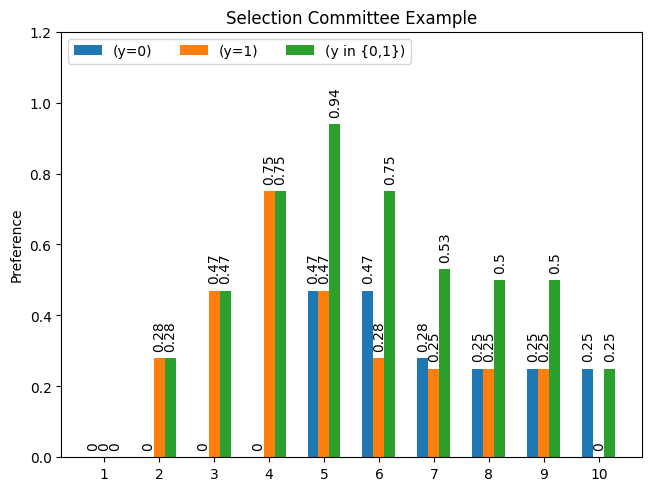

In [4]:
# Using implications 
x,y = symbols('x y')
 
def cte(n):
    '''The constant constraint returning the value n'''
    return Lambda((x,y), n)

m = [ 
      [cte(0.3), cte(0.2), cte(0.3), cte(0.2)],
      [cte(0.2), cte(0.3), cte(0.1), cte(0.4)],
      [cte(0.2), cte(0.4), cte(0.2), cte(0.2)],
      [cte(0.1), cte(0.1), cte(0.5), cte(0.3)]]

def def1(a,b,c,d):
    ''' y=0 -> a <= x <= b and 
        y=1 -> c <= x <= d'''
    return Lambda((x,y), Piecewise((1.0, ((Ge(x, a) & Le(x,b)) | Eq(y,1)) &  ((Ge(x, c) & Le(x,d)) | Eq(y,0))   ), (0.0, True)))


def def2(yv,a,b):
    ''' y = yv and a <= x <= b'''
    return Lambda((x,y), Piecewise((1.0, Eq(y, yv) & ( Ge(x,a) & Le(x, b  ) )), (0.0, True)))

def def3(a,b):
    ''' a <= x <= b (regardless y)'''
    return Lambda((x,y), Piecewise((1.0,  ( Ge(x,a) & Le(x, b  ) )), (0.0, True)))
# Using implications 
x,y = symbols('x y')
 
def cte(n):
    '''The constant constraint returning the value n'''
    return Lambda((x,y), n)

m = [ 
      [cte(0.3), cte(0.2), cte(0.3), cte(0.2)],
      [cte(0.2), cte(0.3), cte(0.1), cte(0.4)],
      [cte(0.2), cte(0.4), cte(0.2), cte(0.2)],
      [cte(0.1), cte(0.1), cte(0.5), cte(0.3)]]

def impdef(a,b,c,d):
    ''' y=0 -> a <= x <= b and 
        y=1 -> c <= x <= d'''
    return Lambda((x,y), Piecewise((1.0, ((Ge(x, a) & Le(x,b)) | Eq(y,1)) &  ((Ge(x, c) & Le(x,d)) | Eq(y,0))   ), (0.0, True)))


def impdef2(yv,a,b):
    ''' y = yv and a <= x <= b'''
    return Lambda((x,y), Piecewise((1.0, Eq(y, yv) & ( Ge(x,a) & Le(x, b  ) )), (0.0, True)))


# Building the R-semiring 
CRing = CSemiring(R, (x,y))

BX = [impdef(5,6,3,5), impdef(8,10,7,9), impdef(5,7,2,4), impdef2(1,4,6) ]


matrixM = matrixMultiplication(CRing, m)
models = [ Model(R, BX,  m, matrixM, simplify=False),
           #Model(R, [impdef2(0,4,6), impdef2(0,5,10), impdef(6,7,3,4), impdef2(1,2,4) ],  m, matrixM, simplify=False)
         ]

data = [ None for _ in range(len(models)) ]
for i,M in enumerate(models):
    for _,b in enumerate(M): 
        data[i] = b
        
result = list()
for m,_ in enumerate(models):
    l = []
    for x in range(10):
        for y in range(2):
            l.append( (x+1,y, round(float(data[m][0](x+1,y)),2)))
    result.append(l)

x_label = [i+1 for i in range (10)]
#data = { f'B{i+1}': [ round(float(data[i][0](j+1)),2) for j in range(5) ] for i in range(len(models)) }

#Projection on y
for r in result:
    y0 = sum(z for _,y,z in r if y ==0 )
    y1 = sum(z for _,y,z in r if y ==1 )
    print(f'c(y=0) = {y0}\t c(y=1)={y1}')
    
x = np.arange(len(x_label))  # the label locations
width = 0.2  # the width of the bars
multiplier = 0

plt.figure(figsize=(60, 5))
fig, ax = plt.subplots(layout='constrained')


#colors = [ 'lightblue', 'darkturquoise', 'lightsalmon', 'tomato'  ]
icolor = 0
for i, measurement in enumerate(result):
    #measurements are tuples (x,y,val)
    values0 = [ x[2] for i,x in enumerate(measurement) if i % 2 == 0] # Values y =0
    values1 = [ x[2] for i,x in enumerate(measurement) if i % 2 == 1] # Values y = 1
    values10 = [ v + values1[i] for i,v in enumerate(values0)] # Projection to x (ignoring y)
    offset = width * multiplier
    rects = ax.bar(x + offset, values0, width, label=f'(y=0)')#, color=colors[icolor])
    icolor += 1
    ax.bar_label(rects, padding=5, rotation=90)
    multiplier += 1
    offset = width * multiplier
    rects = ax.bar(x + offset, values1, width, label=f'(y=1)')#, color=colors[icolor])
    icolor += 1
    ax.bar_label(rects, padding=5, rotation=90)
    multiplier += 1
    offset = width * multiplier
    rects = ax.bar(x + offset, values10, width, label='(y in {0,1})')#, color=colors[icolor])
    icolor += 1
    ax.bar_label(rects, padding=5, rotation=90)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Preference')
ax.set_title('Selection Committee Example')
ax.set_xticks(x + width, x_label)
ax.legend(loc='upper left', ncols=8)
ax.set_ylim(0, 1.2)

plt.savefig('ex4.png', format='png', dpi=300, bbox_inches='tight')
plt.show()

plt.close()



In [5]:
# Computing the distances in the previous example  

domain = [ (x+1,y) for x in range(10) for y in range(2)]

model = Model(R, BX,  m, matrixM, simplify=False) 

data = {}
totaltime = 0
for k,b in enumerate(model): 
    totaltime += 1
    vB = 0 # The global distance
    for i in range(4):
        for j in range(4):
            if i<j:
                d = round(Distance(domain, b[i],b[j],0.5),2)
                data[(k,i,j)] =  d
                vB = max(d, vB)
    data[(k,-1,-1)] = vB
                

print(data)


{(0, 0, 1): 4.0, (0, 0, 2): 1.0, (0, 0, 3): 1.0, (0, 1, 2): 5.0, (0, 1, 3): 4.12, (0, 2, 3): 2.0, (0, -1, -1): 5.0, (1, 0, 1): 1.41, (1, 0, 2): 2.24, (1, 0, 3): 1.0, (1, 1, 2): 1.0, (1, 1, 3): 2.24, (1, 2, 3): 3.16, (1, -1, -1): 3.16, (2, 0, 1): 0.0, (2, 0, 2): 1.0, (2, 0, 3): 0.0, (2, 1, 2): 1.0, (2, 1, 3): 0.0, (2, 2, 3): 1.0, (2, -1, -1): 1.0, (3, 0, 1): 0.0, (3, 0, 2): 0.0, (3, 0, 3): 0.0, (3, 1, 2): 0.0, (3, 1, 3): 0.0, (3, 2, 3): 0.0, (3, -1, -1): 0.0, (4, 0, 1): 0.0, (4, 0, 2): 0.0, (4, 0, 3): 0.0, (4, 1, 2): 0.0, (4, 1, 3): 0.0, (4, 2, 3): 0.0, (4, -1, -1): 0.0, (5, 0, 1): 0.0, (5, 0, 2): 0.0, (5, 0, 3): 0.0, (5, 1, 2): 0.0, (5, 1, 3): 0.0, (5, 2, 3): 0.0, (5, -1, -1): 0.0, (6, 0, 1): 0.0, (6, 0, 2): 0.0, (6, 0, 3): 0.0, (6, 1, 2): 0.0, (6, 1, 3): 0.0, (6, 2, 3): 0.0, (6, -1, -1): 0.0, (7, 0, 1): 0.0, (7, 0, 2): 0.0, (7, 0, 3): 0.0, (7, 1, 2): 0.0, (7, 1, 3): 0.0, (7, 2, 3): 0.0, (7, -1, -1): 0.0, (8, 0, 1): 0.0, (8, 0, 2): 0.0, (8, 0, 3): 0.0, (8, 1, 2): 0.0, (8, 1, 3): 0.0, (

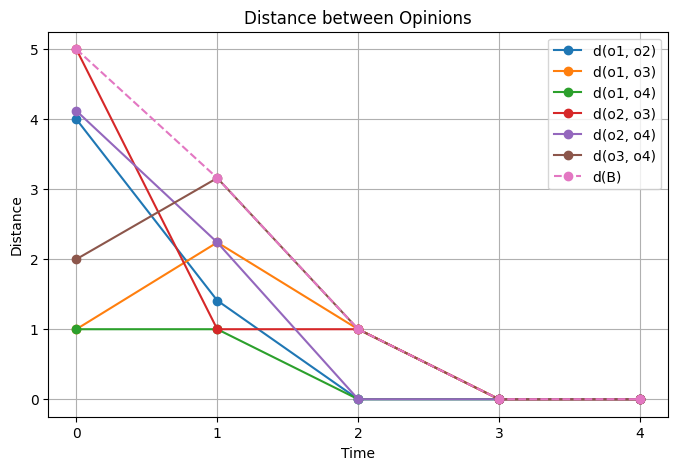

In [6]:
D = [(0, [1, 2, 3]), (1, [3, 4, 5]), (2, [4, 2, 1]), (3, [5, 6, 2])]

# Extract time and variables
time = [t for t in range(5)]
distvalues = [None for _ in range(7)] # Comparing ci and cj and the global distance


# Plot the data
plt.figure(figsize=(8, 5))
for i in range(4):
        for j in range(4):
            if i<j:
                distances = [ data[(t,i,j)] for t in time ]
                plt.plot(time, distances, marker='o', linestyle='-', label=f'd(o{i+1}, o{j+1})')
                
# GLobal distance 
distances = [ data[(t,-1,-1)] for t in time ]
plt.plot(time, distances, marker='o', linestyle='--', label=f'd(B)')
                
# Labels and legend
plt.xlabel('Time')
plt.ylabel('Distance')
plt.title('Distance between Opinions')
plt.legend()
plt.grid(True)
plt.xticks(time)  # Ensure only integer values are shown on x-axis

# Show plot
plt.savefig('ex5.png', format='png', dpi=300, bbox_inches='tight')

plt.show()

In [10]:
# Analyzing the case of extreme opinions 
p  = Symbol('p')

def cte(n):
    return Lambda((p,), n)
    
m = [ 
     [cte(0.3), cte(0.7)],
     [cte(0.4), cte(0.6)]
    ]

matrixM = matrixMultiplication(CRing, m)
d =  Lambda((p,), Piecewise( (0.2, (Eq(p,2))), (0.3, Eq(p,3)), (0.0, True)))

models = [
        Model(R, [ext, d],  m, matrixM, False, compare),
        Model(R, [ext, notext],  m, matrixM, False, compare)
        ] 


data = [None for _ in range(len(models))]
for i,M in  enumerate(models):
    for _,b in enumerate(M):  
        data[i] = b
 
x_label = [i+1 for i in range (5)]
data = { f'B{i+1}': [ round(float(data[i][0](j+1)),2) for j in range(5) ] for i in range(len(models)) }

print(data)


{'B1': [0.36, 0.13, 0.19, 0.0, 0.36], 'B2': [0.36, 0.64, 0.64, 0.64, 0.36]}
